# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [3]:
# Loading the dataset
credit_card_data = pd.read_csv('creditcard.csv')

In [4]:
# Performing Exploratory Data Analysis (EDA)
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


First five rows of the dataset

# Dataset Information

In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The `data.info()` function provides a summary of the dataset's structure and attributes. Here are the key observations:

- The dataset consists of 8 rows and 31 columns.
- Each column represents a different feature or attribute.
- The data types of the features include integers and floats.

In [7]:
# Distribution of legit transactions and fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

0 --> Legit Transaction

1 --> Fraudulent Transaction

- There are 284,315 instances of legitimate transactions (Class 0).
- There are only 492 instances of fraudulent transactions (Class 1).

This imbalance in class distribution poses a challenge for modeling, as the minority class may be underrepresented and harder to detect. Addressing class imbalance is crucial to ensure that the model effectively learns patterns associated with fraudulent transactions without being biased towards the majority class.

In [8]:
# Separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

`legit = credit_card_data[credit_card_data.Class == 0`: This line creates a new DataFrame called legit containing only the rows where the "Class" column has a value of 0, indicating legitimate transactions.

`fraud = credit_card_data[credit_card_data.Class == 1]`: This line creates another new DataFrame called fraud containing only the rows where the "Class" column has a value of 1, indicating fraudulent transactions.

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# Descriptive Statistics

In [11]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Using the `credit_card_data.describe()` function, descriptive statistics of the numerical features are computed. Here are some key statistics:

- **Count**: The number of non-null values in each feature.
- **Mean**: The average value of each feature.
- **Standard Deviation (Std)**: The measure of the dispersion or spread of the values.
- **Minimum (Min)**: The smallest value observed in each feature.
- **25th Percentile (25%)**: The value below which 25% of the data falls.
- **Median (50%)**: The middle value of the dataset.
- **75th Percentile (75%)**: The value below which 75% of the data falls.
- **Maximum (Max)**: The largest value observed in each feature.

These statistics provide insights into the central tendency, dispersion, and distribution of the numerical features in the dataset.

In [12]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# Comparing the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


This computes the mean values of each feature for two classes.
This shows the average values of each features separately for legitimate and fraudulent transactions.By comparing these mean values, we can observe any potential differences or patterns between the two classes. This comparison helps in identifying features that may be more indicative of fraudulent activity compared to legitimate transactions.

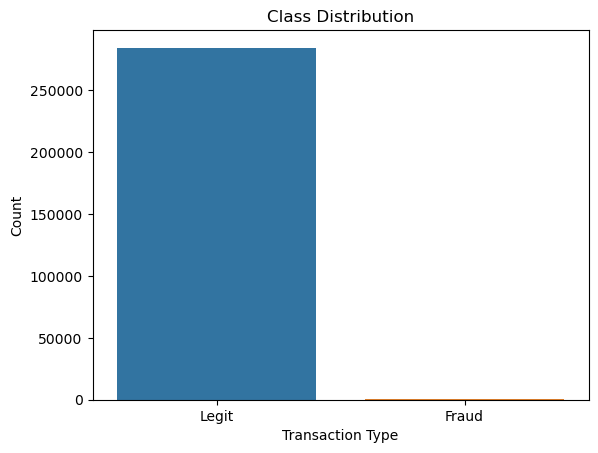

In [16]:
# Visualize the class distribution with custom labels
sns.countplot(x='Class', data=credit_card_data)
plt.title('Class Distribution')
plt.xticks([0, 1], ['Legit', 'Fraud'])  # Set custom tick labels
plt.xlabel('Transaction Type')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.show()

- `plt.xticks([0, 1], ['Legit', 'Fraud'])` sets the custom tick labels for the x-axis. The first list `[0, 1]` specifies the positions of the ticks, and the second list `['Legit', 'Fraud']` specifies the labels.
- `plt.xlabel('Transaction Type')` sets the label for the x-axis.
- `plt.ylabel('Count')` sets the label for the y-axis.

# Data Cleaning and Preprocessing

In [17]:
#Checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The dataset is complete and does not contain any missing values or null entries.

In [18]:
#checking for duplicates
credit_card_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool


The output `credit_card_data.duplicated()` returns a pandas Series with boolean values indicating whether each row in the DataFrame `credit_card_data` is a duplicate of a previous row.

- If a row is a duplicate, the corresponding value in the Series is `True`.
- If a row is not a duplicate, the corresponding value in the Series is `False`.

In this case, all the values in the Series are `False`, indicating that there are no duplicate rows in the `credit_card_data` DataFrame. Each row is unique.

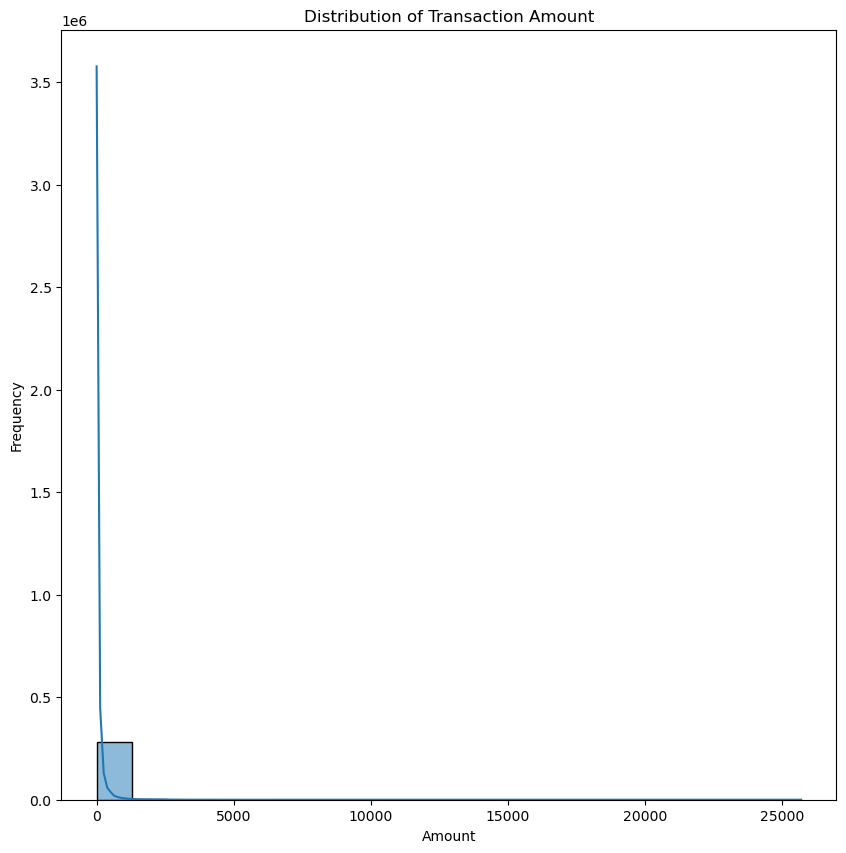

In [20]:
# Histogram for transaction amount
plt.figure(figsize=(10, 10))
sns.histplot(credit_card_data['Amount'], bins=20, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

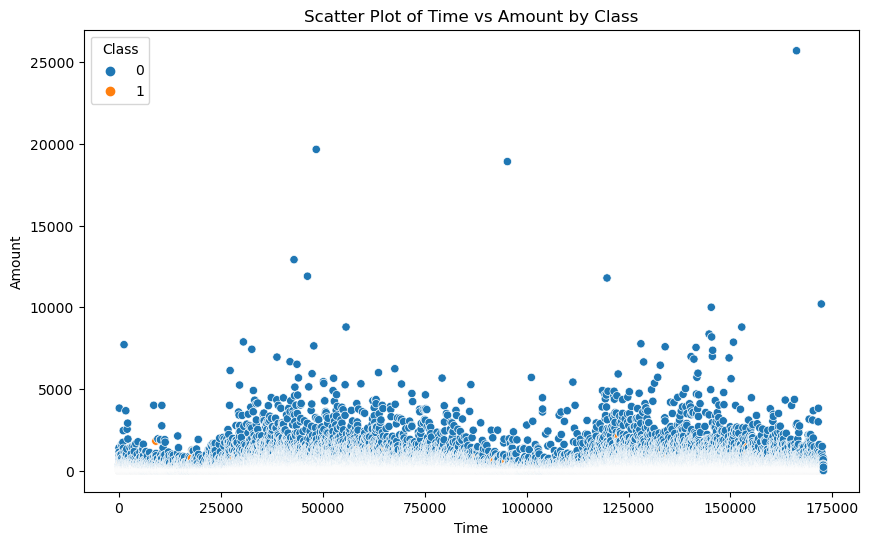

In [22]:
# Scatter plot for time vs amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', data=credit_card_data, hue='Class')
plt.title('Scatter Plot of Time vs Amount by Class')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

In [23]:
# Compute correlation matrix
correlation_matrix = credit_card_data.corr()

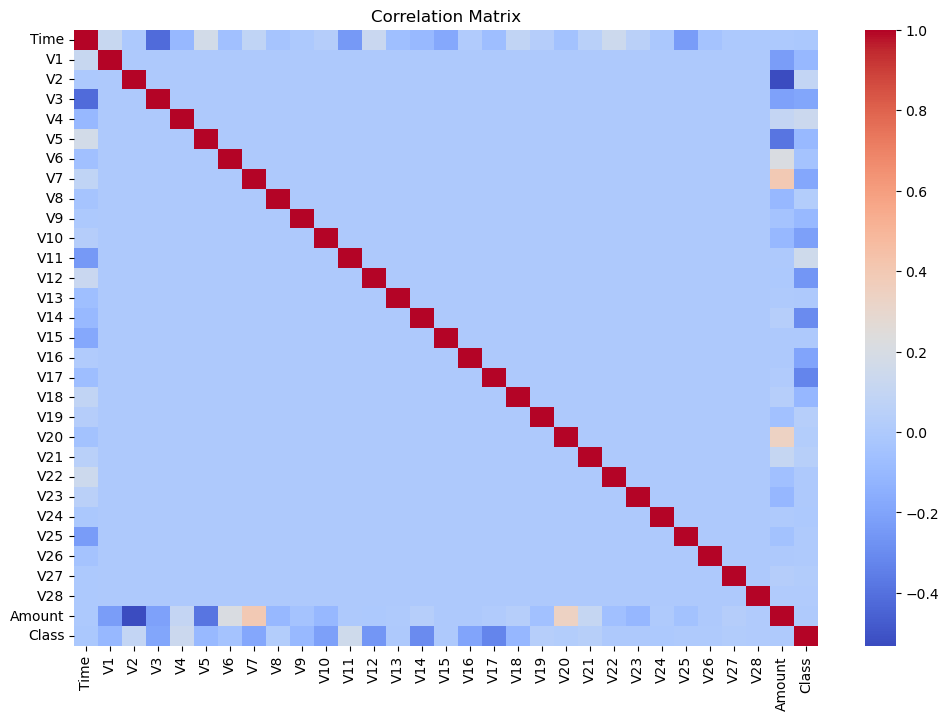

In [25]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


Using a heatmap for correlation analysis allows for easy identification of strong positive or negative correlations between features. It helps in understanding how features are related to each other and can provide insights into which features are most important or redundant for the analysis. 

# Addressing Imbalanced Dataset

### Random Undersampling

In [27]:
# Building a sample dataset containing similar distribution of normal transactions and fraudulent transcations 
legit_sample = legit.sample(n=492)

To balance the classes, random undersampling involves randomly selecting a subset of observations from the majority class (normal transactions) to match the number of observations in the minority class (fraudulent transactions). In this case, `legit_sample` is created by randomly sampling 492 observations from the majority class (`legit`), which is equal to the number of observations in the minority class (`fraud`).

By doing so, the resulting `legit_sample` dataset contains a similar distribution of normal transactions and fraudulent transactions, effectively addressing the class imbalance issue. This balanced dataset can then be used for further analysis and model training to ensure that the machine learning algorithms are not biased towards the majority class.

In [28]:
#concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

This operation combines the rows of both DataFrames to create a single new DataFrame called `new_dataset`.

In [30]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
137815,82342.0,-2.753024,2.236323,-1.025319,0.686200,-1.420923,-0.735902,-0.867581,1.941171,-0.890778,...,0.295254,0.042920,0.166814,0.014914,0.219241,-0.411241,-1.196887,-0.358398,38.27,0
33779,37383.0,0.823700,-0.454805,-0.026265,1.439697,-0.136177,0.157917,0.289739,-0.012930,0.362400,...,-0.021198,-0.282219,-0.290871,-0.418947,0.644565,-0.300682,-0.000019,0.043865,202.86,0
155935,106831.0,-2.341243,-0.968245,-1.407458,0.076160,2.421768,-1.622084,2.051034,-1.396755,2.153725,...,-0.536834,0.444626,0.065173,0.668374,-0.377223,0.396705,-0.582924,0.612335,155.05,0
81618,59016.0,-0.754173,0.630477,1.501071,0.340628,0.283952,0.113798,1.030670,0.134642,-0.605788,...,0.132816,0.391467,0.019666,0.224513,-0.025233,-0.544298,0.119455,0.136135,85.00,0
245545,152798.0,2.207743,-0.640644,-1.500169,-0.586906,-0.136108,-0.574300,-0.204756,-0.316150,-0.485870,...,-0.705778,-1.458278,0.274153,-1.028757,-0.289854,0.372468,-0.056557,-0.062650,24.99,0


In [31]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [32]:
new_dataset['Class'].value_counts() 

Class
0    492
1    492
Name: count, dtype: int64

`new_dataset['Class'].value_counts()` computes the frequency of unique values in the 'Class' column of the DataFrame `new_dataset`.


- `Class 0 (Legit Transactions)`: There are 492 observations in the 'Class' column with a value of 0, indicating legitimate transactions.

- `Class 1 (Fraudulent Transactions)`: Similarly, there are 492 observations in the 'Class' column with a value of 1, representing fraudulent transactions.

This output confirms that the new_dataset has been successfully balanced through random undersampling, with an equal number of observations for both classes. Each class now comprises 492 observations, ensuring that the dataset is not skewed towards either class and is suitable for training machine learning models.

In [34]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94226.945122,-0.104840,0.158830,0.047582,-0.011513,0.078970,-0.025971,0.033460,0.017369,0.025615,...,-0.022813,-0.000850,-0.080248,0.002601,-0.019173,-0.008955,0.008395,0.022006,-0.002113,70.936138
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


This shows that the original dataset and the resampled dataset are almost similar in nature. The nature of the dataset is not changed.

In [35]:
#Splitting the data into Features(X) and Target variable (y)
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

`X` represents the features or independent variables of the dataset. It is obtained by dropping the column labeled 'Class' from the original dataset data. This means that `X` contains all the columns of `data` except for the 'Class' column.

`y` represents the target variable or dependent variable of the dataset. It is obtained by selecting only the 'Class' column from the original dataset `data`. This means that `y` contains the values of the 'Class' column, which typically represent the labels or outcomes that we are trying to predict or classify.

In [36]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
137815   82342.0 -2.753024  2.236323 -1.025319  0.686200 -1.420923 -0.735902   
33779    37383.0  0.823700 -0.454805 -0.026265  1.439697 -0.136177  0.157917   
155935  106831.0 -2.341243 -0.968245 -1.407458  0.076160  2.421768 -1.622084   
81618    59016.0 -0.754173  0.630477  1.501071  0.340628  0.283952  0.113798   
245545  152798.0  2.207743 -0.640644 -1.500169 -0.586906 -0.136108 -0.574300   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [37]:
print(y)

137815    0
33779     0
155935    0
81618     0
245545    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Train-Test Split (20/80)

In [38]:
#Split the data into Training data and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

`train_test_split()` is used to split the dataset into training and testing sets for both the features (X) and the target variable (y).

- `X`: The features DataFrame containing all the independent variables.
- `y`: The target Series containing the dependent variable.
- `test_size`: This parameter specifies the proportion of the dataset that should be included in the testing set. In this case, it is set to 0.2, indicating that 20% of the data will be used for testing.
- `stratify`: This parameter ensures that the splitting process maintains the same proportion of classes as in the original dataset. It takes the target variable (y) as input to ensure that both the training and testing sets have similar class distributions.
- `random_state`: This parameter ensures reproducibility by fixing the random seed used for shuffling and splitting the data. By setting it to a specific integer value (2 in this case), the split will be the same each time the code is executed.

After executing this code, four datasets are created:

- `X_train`: The training set containing features for model training.
- `X_test`: The testing set containing features for model evaluation.
- `y_train`: The corresponding target labels for the training set.
- `y_test`: The corresponding target labels for the testing set.
These datasets are then ready to be used for training and evaluating machine learning models.

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


- The feature matrix (X) has a shape of (984, 30), indicating 984 samples and 30 features.
- The training subset (X_train) comprises 787 samples with the same 30 features, denoted by its shape of (787, 30).
- The testing subset (X_test) contains 197 samples, maintaining consistency with the original 30 features, as reflected by its shape of (197, 30).
- This section ensures that both the training and testing sets preserve the same feature dimensions for accurate model training and evaluation.


# Model Development

## Logistic Regression 

In [43]:
lr_model = LogisticRegression()

In [44]:
# training the Logistic Regression Model with training data
lr_model.fit(X_train, y_train)

/Users/abhusal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

This is just a warning message.

In [45]:
# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

In [46]:
# Model Evaluation - Logistic Regression
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Model Evaluation:
Accuracy: 0.9137055837563451
ROC AUC Score: 0.9134714491857349

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        99
           1       0.96      0.87      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197


Confusion Matrix:
[[95  4]
 [13 85]]


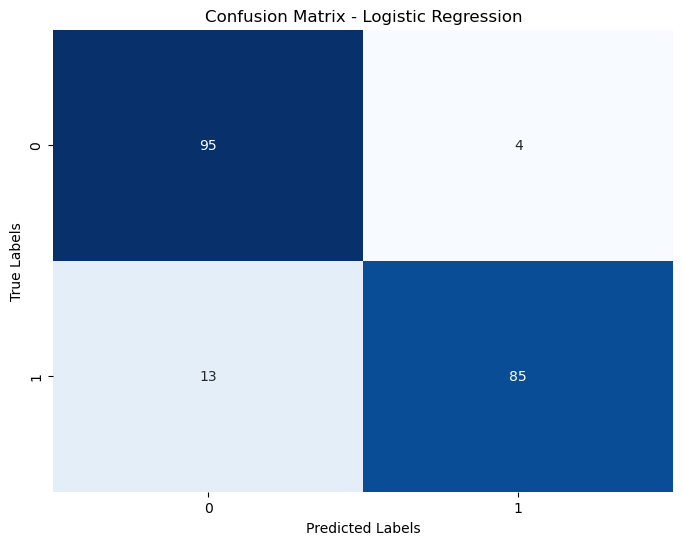

In [47]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [48]:
from sklearn.metrics import roc_curve

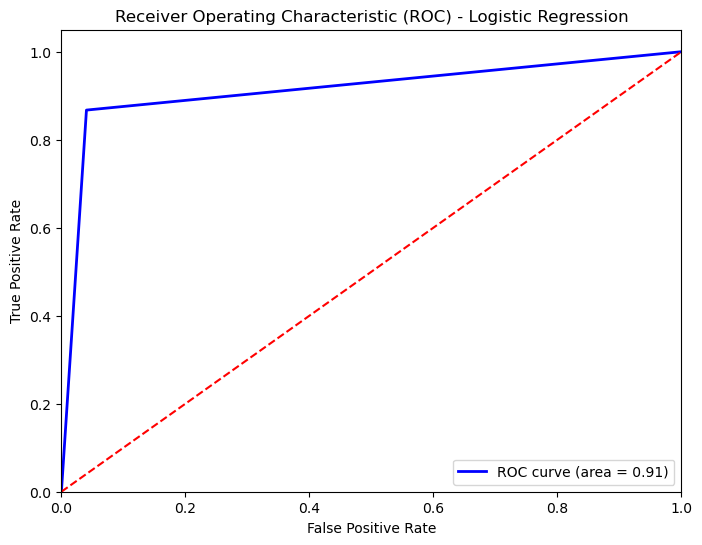

In [49]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_lr))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

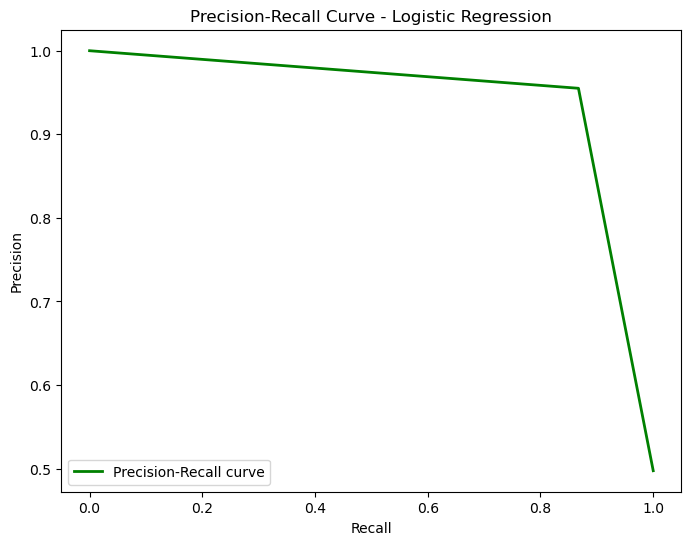

In [50]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lr)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc="lower left")
plt.show()


## Random Forest

In [51]:
# Train a random forest classifier
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [52]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [53]:
# Model Evaluation - Random Forest
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Model Evaluation:
Accuracy: 0.9238578680203046
ROC AUC Score: 0.9236239950525664

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197


Confusion Matrix:
[[96  3]
 [12 86]]


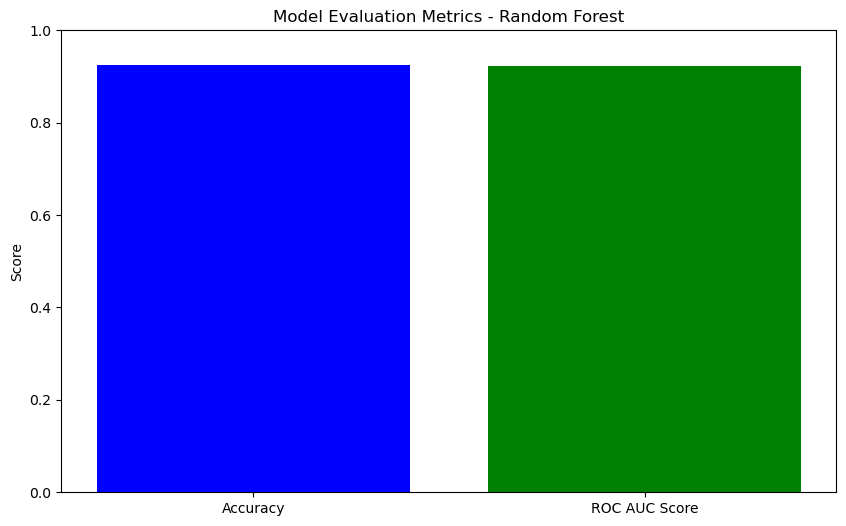

In [58]:
# Plotting Accuracy and ROC AUC Score
plt.figure(figsize=(10, 6))
plt.bar(['Accuracy', 'ROC AUC Score'], [accuracy_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_rf)], color=['blue', 'green'])
plt.title('Model Evaluation Metrics - Random Forest')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

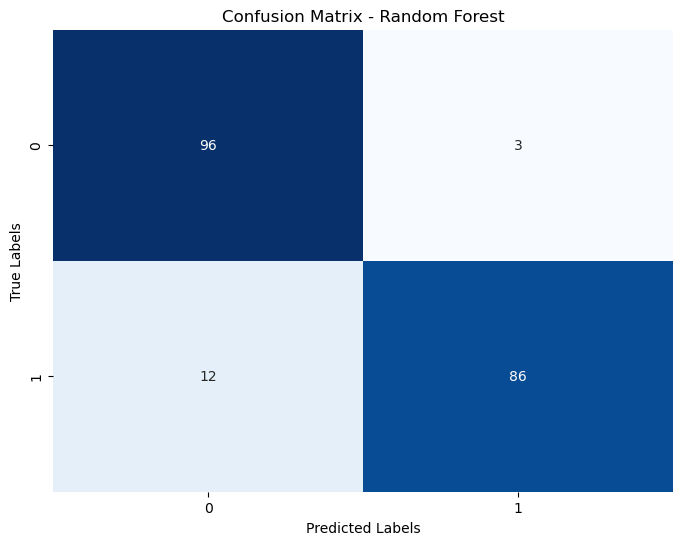

In [57]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

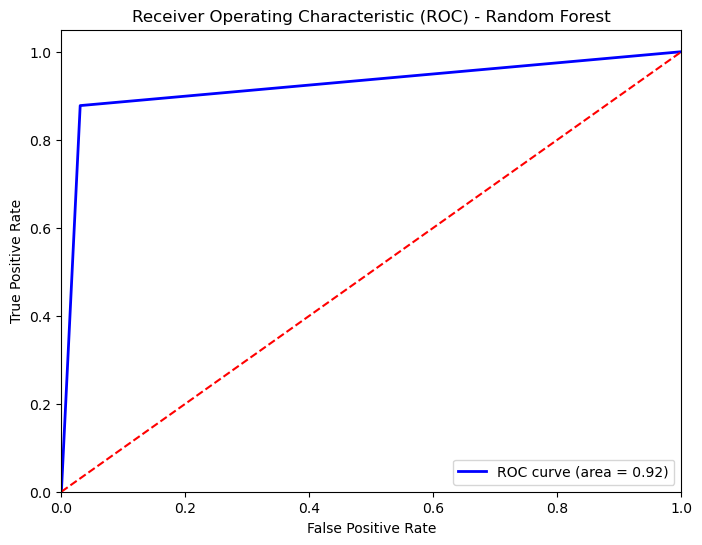

In [60]:
# Compute ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_rf))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [61]:
# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_rf)

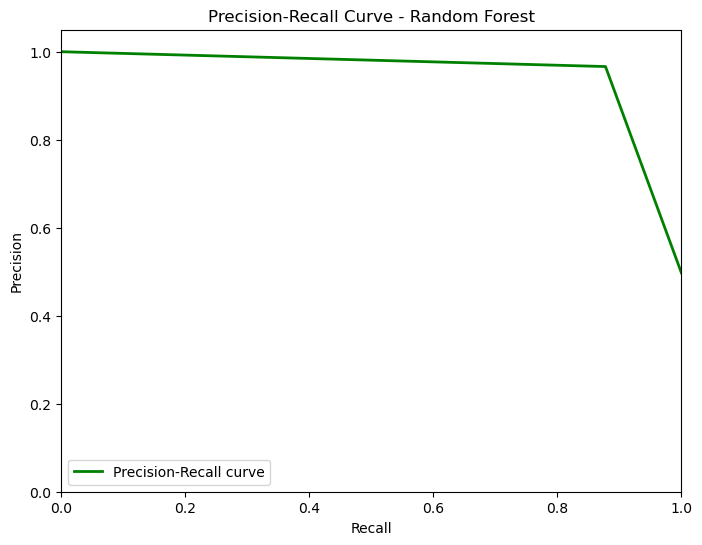

In [62]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc="lower left")
plt.show()